The task is to build an Artificial Neural Network model for text classification using Tensorflow

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

In [2]:
# download BBC text classification dataset
# original dataset on Kaggle: https://www.kaggle.com/datasets/shivamkushwaha/bbc-full-text-document-classification)
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

File ‘bbc_text_cls.csv’ already there; not retrieving.



In [3]:
# save the dataset in Pandas dataframe
df = pd.read_csv('bbc_text_cls.csv')

In [4]:
# assign integers to labels 
df['targets'] = df['labels'].astype('category').cat.codes

In [5]:
df[['labels', 'targets']].groupby(by=['labels','targets'], as_index=False).sum()

,labels,targets
0,business,0
1,entertainment,1
2,politics,2
3,sport,3
4,tech,4


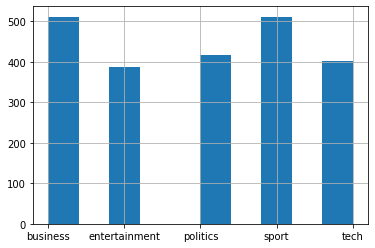

In [6]:
df['labels'].hist()

In [7]:
# make train and test sets
df_train, df_test = train_test_split(df, test_size=0.3)

In [8]:
# use TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english')
Xtrain = tfidf.fit_transform(df_train['text'])
Xtest = tfidf.transform(df_test['text'])

In [9]:
Ytrain = df_train['targets']
Ytest = df_test['targets']

In [10]:
# number of classes
K = df['targets'].nunique()

In [11]:
# input dimensions
D = Xtrain.shape[1]

In [12]:
# build a model
i = Input(shape=(D,))
x = Dense(300, activation='relu')(i)
x = Dense(K)(x)

model = Model(i, x)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 25318)]           0         
                                                                 
 dense (Dense)               (None, 300)               7595700   
                                                                 
 dense_1 (Dense)             (None, 5)                 1505      
                                                                 
Total params: 7,597,205
Trainable params: 7,597,205
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam', metrics=['accuracy'])

In [15]:
# data must not be sparse matrix before passing into tensorflow
Xtrain = Xtrain.toarray()
Xtest = Xtest.toarray()

In [16]:
r = model.fit(Xtrain, Ytrain, validation_data=(Xtest, Ytest), epochs=7, batch_size=128)

Epoch 1/7
13/13 [==============================] - 1s 48ms/step - loss: 1.4614 - accuracy: 0.8606 - val_loss: 1.1894 - val_accuracy: 0.9671
Epoch 2/7
13/13 [==============================] - 0s 38ms/step - loss: 0.9006 - accuracy: 0.9955 - val_loss: 0.7224 - val_accuracy: 0.9626
Epoch 3/7
13/13 [==============================] - 0s 37ms/step - loss: 0.4310 - accuracy: 0.9987 - val_loss: 0.4128 - val_accuracy: 0.9596
Epoch 4/7
13/13 [==============================] - 0s 38ms/step - loss: 0.1853 - accuracy: 0.9994 - val_loss: 0.2676 - val_accuracy: 0.9626
Epoch 5/7
13/13 [==============================] - 0s 39ms/step - loss: 0.0885 - accuracy: 1.0000 - val_loss: 0.2049 - val_accuracy: 0.9671
Epoch 6/7
13/13 [==============================] - 0s 37ms/step - loss: 0.0502 - accuracy: 1.0000 - val_loss: 0.1749 - val_accuracy: 0.9686
Epoch 7/7
13/13 [==============================] - 0s 38ms/step - loss: 0.0331 - accuracy: 1.0000 - val_loss: 0.1578 - val_accuracy: 0.9686


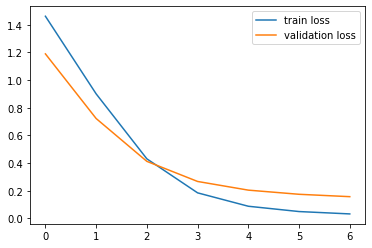

In [17]:
# loss per iteration
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='validation loss')
plt.legend()

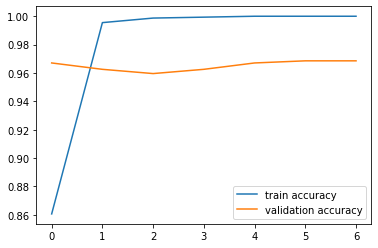

In [18]:
# accuracy per iteration
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='validation accuracy')
plt.legend()